In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import json,requests

  ***Basic Description of How Prediction is done***

In [2]:

cases_per_day=pd.io.json.json_normalize(requests.get('https://api.rootnet.in/covid19-in/stats/history').json()['data'])
#.rename(columns = {"total":"Total","confirmedCasesIndian":"Indian_cases","confirmedCasesForeign":"Foreign_cases","discharged":"Discharged","deaths":"Deaths"})

In [3]:
cases_per_day_df=pd.DataFrame(cases_per_day)

In [4]:
cases_per_day_df

,day,regional,summary.total,summary.confirmedCasesIndian,summary.confirmedCasesForeign,summary.discharged,summary.deaths,summary.confirmedButLocationUnidentified
0,2020-03-10,"[{'loc': 'Delhi', 'confirmedCasesIndian': 4, '...",47,31,16,0,0,0
1,2020-03-11,"[{'loc': 'Delhi', 'confirmedCasesIndian': 5, '...",60,44,16,0,0,0
2,2020-03-12,"[{'loc': 'Delhi', 'confirmedCasesIndian': 6, '...",73,56,17,0,0,0
3,2020-03-13,"[{'loc': 'Andhra Pradesh', 'confirmedCasesIndi...",82,65,17,10,2,0
4,2020-03-14,"[{'loc': 'Andhra Pradesh', 'confirmedCasesIndi...",84,67,17,10,2,0
...,...,...,...,...,...,...,...,...
109,2020-06-27,"[{'confirmedCasesIndian': 72, 'confirmedCasesF...",508953,500892,38,295881,15685,8023
110,2020-06-28,"[{'confirmedCasesIndian': 72, 'confirmedCasesF...",528859,520982,38,309713,16095,7839
111,2020-06-29,"[{'confirmedCasesIndian': 76, 'confirmedCasesF...",548318,540995,38,321723,16475,7285
112,2020-06-30,"[{'confirmedCasesIndian': 90, 'confirmedCasesF...",566840,559798,38,334822,16893,7004


In [5]:
new_cases_per_day_df=cases_per_day_df[['day','summary.total']]

In [6]:
new_cases_per_day_df

,day,summary.total
0,2020-03-10,47
1,2020-03-11,60
2,2020-03-12,73
3,2020-03-13,82
4,2020-03-14,84
...,...,...
109,2020-06-27,508953
110,2020-06-28,528859
111,2020-06-29,548318
112,2020-06-30,566840


In [71]:
new_cases_per_day_df.rename(columns = {'day':'Day','summary.total':'Total'}, inplace = True) 

In [72]:
#pd.set_option('display.max_rows',None)

new_cases_per_day_df


,Total,Cases First Difference,Cases Second Difference,Cases Third Difference,forecast
Day,,,,,
2020-03-10,47,NaN,NaN,NaN,NaN
2020-03-11,60,13.0,NaN,NaN,NaN
2020-03-12,73,13.0,0.0,NaN,NaN
2020-03-13,82,9.0,-4.0,-4.0,NaN
2020-03-14,84,2.0,-7.0,-3.0,NaN
...,...,...,...,...,...
2020-06-27,508953,18552.0,1256.0,882.0,NaN
2020-06-28,528859,19906.0,1354.0,98.0,NaN
2020-06-29,548318,19459.0,-447.0,-1801.0,NaN


In [9]:
new_cases_per_day_df.tail()


,Day,Total
109,2020-06-27,508953
110,2020-06-28,528859
111,2020-06-29,548318
112,2020-06-30,566840
113,2020-07-01,585493


In [10]:
new_cases_per_day_df.set_index('Day',inplace=True)

In [11]:
new_cases_per_day_df

,Total
Day,
2020-03-10,47
2020-03-11,60
2020-03-12,73
2020-03-13,82
2020-03-14,84
...,...
2020-06-27,508953
2020-06-28,528859
2020-06-29,548318


In [12]:
new_cases_per_day_df.describe()

,Total
count,114.000000
mean,127348.219298
std,160820.038745
min,47.000000
25%,4910.250000
50%,48051.000000
75%,205387.750000
max,585493.000000


Visualize the data

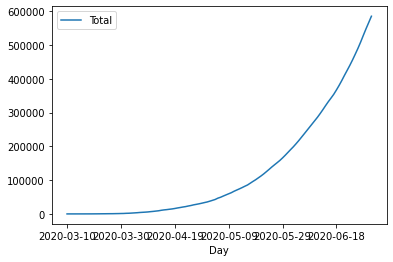

In [13]:
new_cases_per_day_df.plot()

In [14]:
#Testing for stationarity
#Using the Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

In [15]:
test_result=adfuller(new_cases_per_day_df['Total'])

In [16]:
def adfuller_test(Total):
  result=adfuller(Total)
  labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1]<=0.05:
    print("Strong evidence against Null Hypothesis, indicating data is stationary")
  else:
    print("Weak evidence against Null Hypothesis, indicating data is non-stationary")

In [17]:
adfuller_test(new_cases_per_day_df['Total'])

ADF Test Statistic : 0.3711829465933047
p-value : 0.9803847071310148
#Lags Used : 13
Number of Observations Used : 100
Weak evidence against Null Hypothesis, indicating data is non-stationary


Since, data is non-stationary now, we have to make it stationary

In [19]:
new_cases_per_day_df['Cases First Difference']=new_cases_per_day_df['Total'].diff(1)

In [20]:
new_cases_per_day_df['Cases Second Difference']=new_cases_per_day_df['Cases First Difference'].diff(1)


In [21]:
new_cases_per_day_df

,Total,Cases First Difference,Cases Second Difference
Day,,,
2020-03-10,47,NaN,NaN
2020-03-11,60,13.0,NaN
2020-03-12,73,13.0,0.0
2020-03-13,82,9.0,-4.0
2020-03-14,84,2.0,-7.0
...,...,...,...
2020-06-27,508953,18552.0,1256.0
2020-06-28,528859,19906.0,1354.0
2020-06-29,548318,19459.0,-447.0


In [125]:
#new_cases_per_day_df['Seasonal First Difference']=new_cases_per_day_df['Total']-new_cases_per_day_df['Total'].shift(5)
#new_cases_per_day_df['Cases Second Difference']=new_cases_per_day_df['Total'].shift(2)

In [126]:
#new_cases_per_day_df['Cases Third Difference']=new_cases_per_day_df['Total'].shift(3)

In [127]:
new_cases_per_day_df

,Total,Cases First Difference,Seasonal First Difference
Day,,,
2020-03-10,47,NaN,NaN
2020-03-11,60,13.0,NaN
2020-03-12,73,13.0,NaN
2020-03-13,82,9.0,NaN
2020-03-14,84,2.0,NaN
...,...,...,...
2020-06-27,508953,18552.0,NaN
2020-06-28,528859,19906.0,528812.0
2020-06-29,548318,19459.0,548258.0


In [22]:
new_cases_per_day_df['Cases Second Difference'].dropna(inplace=True)

In [23]:
adfuller_test(new_cases_per_day_df['Cases Second Difference'])

ADF Test Statistic : -1.9387689369677925
p-value : 0.31404841281169993
#Lags Used : 11
Number of Observations Used : 100
Weak evidence against Null Hypothesis, indicating data is non-stationary


In [25]:
new_cases_per_day_df['Cases Third Difference']=new_cases_per_day_df['Cases Second Difference'].diff(1)

In [29]:
new_cases_per_day_df['Cases Third Difference'].dropna(inplace=True)

In [30]:
adfuller_test(new_cases_per_day_df['Cases Third Difference'])

ADF Test Statistic : -5.781210050633214
p-value : 5.120803535591553e-07
#Lags Used : 13
Number of Observations Used : 97
Strong evidence against Null Hypothesis, indicating data is stationary


In [34]:
new_cases_per_day_df

,Total,Cases First Difference,Cases Second Difference,Cases Third Difference
Day,,,,
2020-03-10,47,NaN,NaN,NaN
2020-03-11,60,13.0,NaN,NaN
2020-03-12,73,13.0,0.0,NaN
2020-03-13,82,9.0,-4.0,-4.0
2020-03-14,84,2.0,-7.0,-3.0
...,...,...,...,...
2020-06-27,508953,18552.0,1256.0,882.0
2020-06-28,528859,19906.0,1354.0,98.0
2020-06-29,548318,19459.0,-447.0,-1801.0


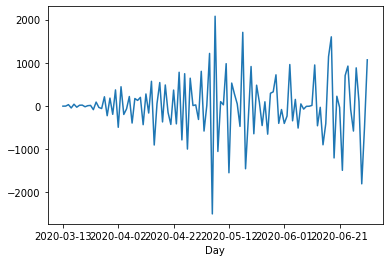

In [31]:
new_cases_per_day_df['Cases Third Difference'].plot()

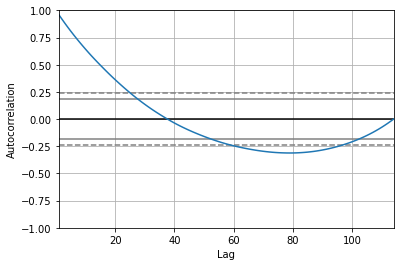

In [32]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(new_cases_per_day_df['Total'])
plt.show()

In [33]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

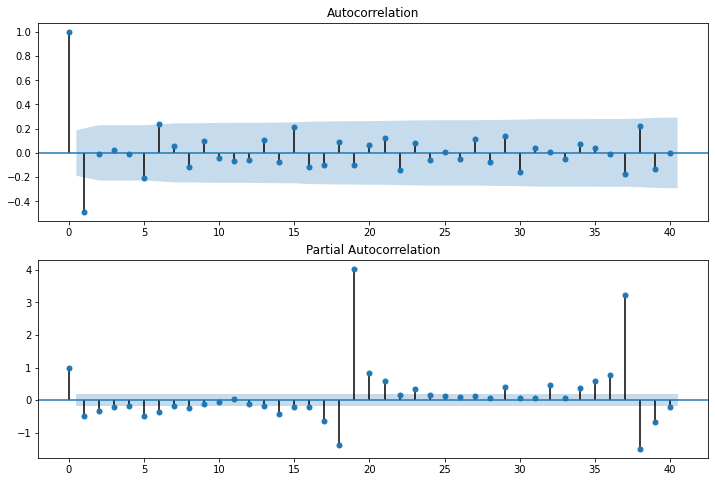

In [34]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(new_cases_per_day_df['Cases Third Difference'].iloc[3:],lags=40,ax=ax1)
ax1=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(new_cases_per_day_df['Cases Third Difference'].iloc[3:],lags=40,ax=ax1)

**Actual Code Starts From *Here*:**

In [2]:

#p=1,d=0,q=0
from statsmodels.tsa.arima_model import ARIMA

In [3]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()


In [5]:
k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

In [6]:
data

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
156,2020-06-26,508953
157,2020-06-27,528859
158,2020-06-28,548318
159,2020-06-29,566840


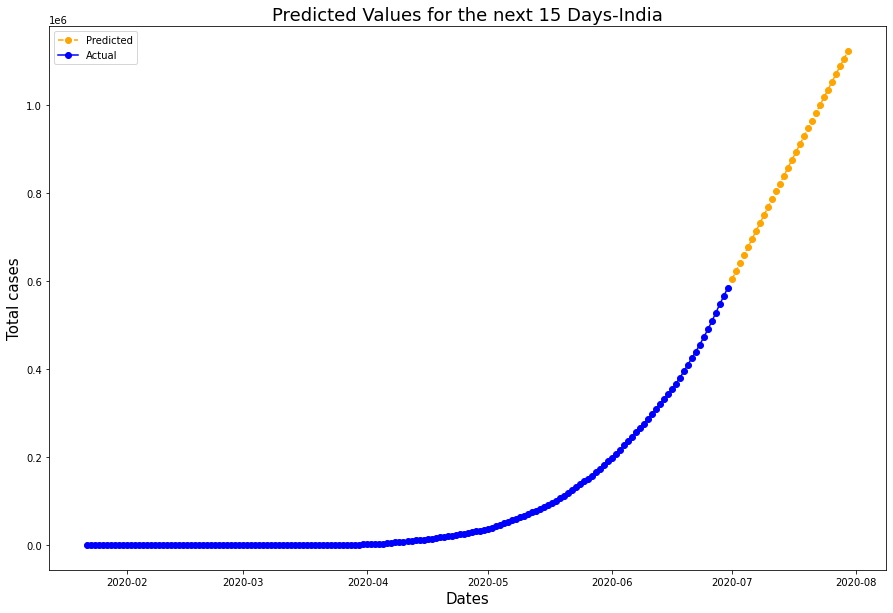

In [7]:
import datetime
arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 15)
plt.ylabel('Total cases',fontsize = 15)
plt.title("Predicted Values for the next 15 Days-India" , fontsize = 18)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'orange',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

In [8]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  160
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1232.360
Method:                       css-mle   S.D. of innovations            525.693
Date:                Wed, 01 Jul 2020   AIC                           2478.720
Time:                        15:42:30   BIC                           2500.247
Sample:                             1   HQIC                          2487.462
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3659.2585   1.29e+04      0.284      0.777   -2.16e+04    2.89e+04
ar.L1.D.y      0.8583      0.078     10.995      0.000       0.705       1.011
ar.L2.D.y      0.1576      0.104      1.520      0.130      -0.046       0.361
ar.L3.D.y      0.1588      0.104      1.527      0.129      -0.045       0.363
ar.L4.D.y     -0.0890      0.105     -0.844      0.400      -0.296       0.118
ar.L5.D.y     -0.0874      0.081     -1.081      0.281      -0.246       0.071
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0020           -0.0000j            1.0020           -0.0000
AR.2            1.5535           -0.0000j            1.5535           -0.0000
AR.3           -0.5630           -1.6390j            1.7330           -0.3027
AR.4           -0.5630           +1.6390j            1.7330            0.3027
AR.5           -2.4481           -0.0000j            2.4481           -0.5000
-----------------------------------------------------------------------------
"""

For USA:

In [9]:
k = df1[df1['Country/Region']=='US'].loc[:,'1/22/20':]
us_confirmed = k.values.tolist()[0] 
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = us_confirmed

In [10]:
data

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
...,...,...
156,2020-06-26,2467554
157,2020-06-27,2510151
158,2020-06-28,2548996
159,2020-06-29,2590651


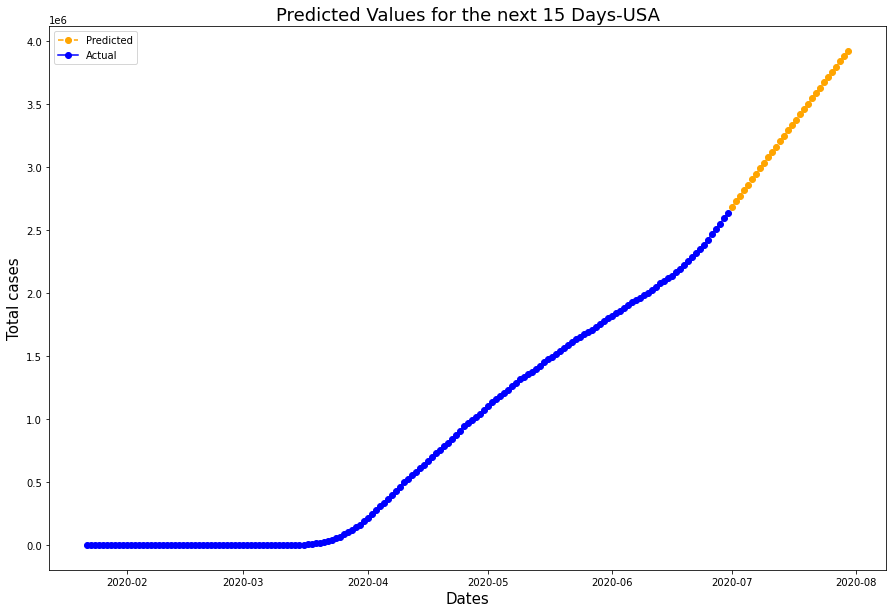

In [11]:
import datetime
arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 15)
plt.ylabel('Total cases',fontsize = 15)
plt.title("Predicted Values for the next 15 Days-USA" , fontsize = 18)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'orange',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

For Italy

In [12]:
k = df1[df1['Country/Region']=='Italy'].loc[:,'1/22/20':]
italy_confirmed = k.values.tolist()[0] 
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = italy_confirmed

In [13]:
data

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
156,2020-06-26,239961
157,2020-06-27,240136
158,2020-06-28,240310
159,2020-06-29,240436


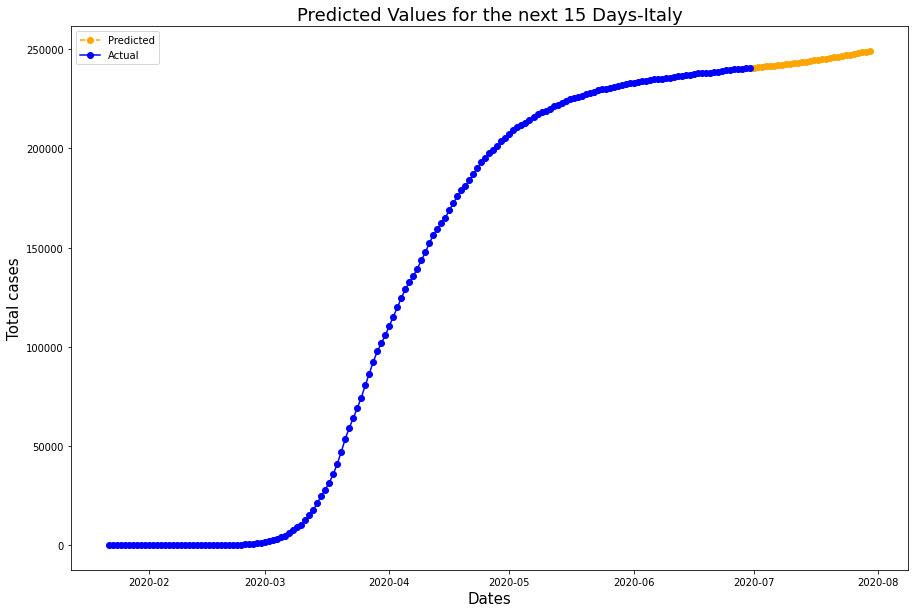

In [15]:
import datetime
arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 15)
plt.ylabel('Total cases',fontsize = 15)
plt.title("Predicted Values for the next 15 Days-Italy" , fontsize = 18)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'orange',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();